### General daily homework -- generate 3 different data sets of 674 random plants following the model model_marker we made in Section 4.2. For each of your 3 data sets:
Make a visualization of the fruit lengths separated by binary_marker (aka MASC06116)

In [2]:
import pandas as pd, seaborn as sns, statsmodels.api as sm
from scipy.stats import norm
sns.set_theme()
fruit_length_geno = pd.read_table("fruit_length_geno.csv",sep=",")
# imports

Create an estimate of the slope without using StatsModels and without using stats.norm(). Show and explain your code for making the estimate. Feel free to confirm your estimate using StatsModels, but I want you to estimate slope the more manual rise-over-run way.

In [91]:
binary_marker = (fruit_length_geno['MASC06116']=='A').astype(int)
to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],
                         "MASC06116": binary_marker})
to_model = to_model[~pd.isnull(to_model['fruit_length'])]
to_model = sm.add_constant(to_model)

y = to_model["fruit_length"]
X = to_model.loc[:,("MASC06116","const")]
model_marker = sm.OLS(y, X).fit()
predicted_values = model_marker.predict(X)

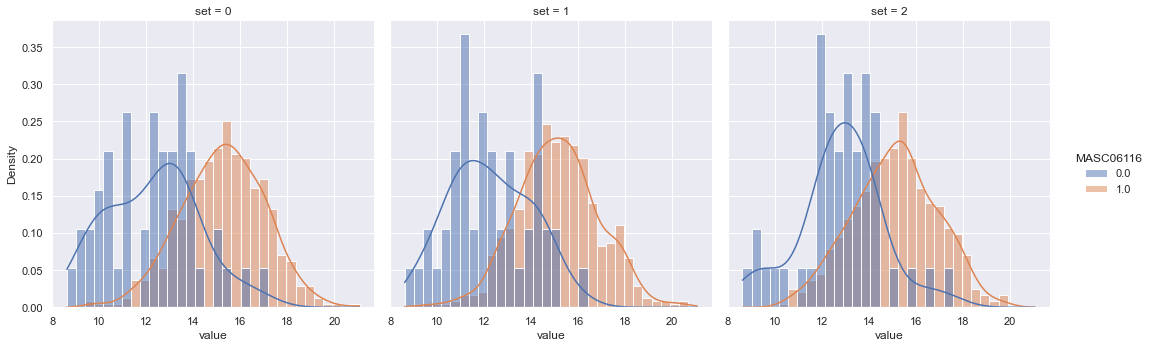

In [114]:
f = {
    'set':[],
    'value':[],
    'MASC06116':[]
}

prediction_model = norm(loc = predicted_values, scale = 1.794643)

for a in range(3):
    arr = prediction_model.rvs()
    for b in range(674):
        f['value'].append(arr[b])
        f['set'].append(a)
        f['MASC06116'].append(to_model.iloc[b,2])

fdf = pd.DataFrame(f)
sns.displot(data=fdf, x='value', hue='MASC06116', col='set', stat='density',common_norm=False, kde=True)

In [130]:
s1m = fdf.iloc[:673].groupby('MASC06116').mean()
s2m = fdf.iloc[674:1347].groupby('MASC06116').mean()
s3m = fdf.iloc[1348:].groupby('MASC06116').mean()
mean = pd.concat((s1m, s2m, s3m))
for c in range(3):
    print(mean.iloc[2*c:2*c+2, 1])

MASC06116
0.0    12.263586
1.0    15.249626
Name: value, dtype: float64
MASC06116
0.0    12.242765
1.0    15.130532
Name: value, dtype: float64
MASC06116
0.0    12.784531
1.0    15.096751
Name: value, dtype: float64
